In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf
import pandas as pd

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

In [31]:
churners=pd.read_csv('./Predict-Customer-Attrition-main/datasets/BankChurners.csv')

In [32]:
churners.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [33]:
list = ['Attrition_Flag', 'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Contacts_Count_12_mon', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Months_on_book']
churners = churners[list]

In [34]:
object_columns = churners.select_dtypes('object').columns



input = churners.iloc[:,1:]
target = churners.iloc[:,0]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(input, target, random_state=42, test_size=0.2)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [36]:
x_train.shape

(8101, 8)

In [41]:
model=Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(8,)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

ValueError: Input 0 of layer conv1d_7 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 8)

In [7]:
model.compile(loss='categorical_crossentropy', # 다중분류에서는 이거쓰고 이중분류에서는 binary
optimizer='adam',                           # mse,mae는 회귀할때 쓰고
metrics=['accuracy'])
# 모델 최적화 설정
MODEL_DIR = './model_1/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="./model_1/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.04553, saving model to ./model_1\01-0.0455.hdf5

Epoch 00002: val_loss improved from 0.04553 to 0.03917, saving model to ./model_1\02-0.0392.hdf5

Epoch 00003: val_loss improved from 0.03917 to 0.03176, saving model to ./model_1\03-0.0318.hdf5

Epoch 00004: val_loss improved from 0.03176 to 0.02899, saving model to ./model_1\04-0.0290.hdf5

Epoch 00005: val_loss improved from 0.02899 to 0.02705, saving model to ./model_1\05-0.0270.hdf5

Epoch 00006: val_loss did not improve from 0.02705

Epoch 00007: val_loss improved from 0.02705 to 0.02529, saving model to ./model_1\07-0.0253.hdf5

Epoch 00008: val_loss did not improve from 0.02529

Epoch 00009: val_loss did not improve from 0.02529

Epoch 00010: val_loss did not improve from 0.02529

Epoch 00011: val_loss did not improve from 0.02529

Epoch 00012: val_loss did not improve from 0.02529

Epoch 00013: val_loss did not improve from 0.02529

Epoch 00014: val_loss did not improve from 0.02529


313/313 [==============================] - 2s 8ms/step - loss: 0.0283 - accuracy: 0.9923

 Test Accuracy: 0.9923


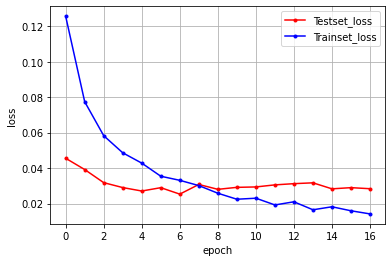

In [12]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test) [1]))
# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()